In [50]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes

In [51]:
def procrustes(data1, data2):
    x1 = np.array(data1, dtype=np.double, copy=True)
    x2 = np.array(data2, dtype=np.double, copy=True)
    
    shift1 = np.mean(x1, 0)
    shift2 = np.mean(x2, 0) 
    x1 -= shift1
    x2 -= shift2

    scale1 = np.linalg.norm(x1)
    scale2 = np.linalg.norm(x2)
    x1 /= scale1
    x2 /= scale2

    R, s = orthogonal_procrustes(x1, x2)
    x2 = np.dot(x2, R.T) * s

    disparity = np.sum(np.square(x1 - x2))

    return shift1, shift2, scale1, scale2, R, s, x1, x2, disparity

[{'box': [1047, 848, 690, 837], 'confidence': 0.9999998807907104, 'keypoints': {'left_eye': (1197, 1225), 'right_eye': (1482, 1164), 'nose': (1333, 1363), 'mouth_left': (1284, 1542), 'mouth_right': (1494, 1486)}}, {'box': [1956, 2647, 35, 57], 'confidence': 0.7206616401672363, 'keypoints': {'left_eye': (1975, 2671), 'right_eye': (1988, 2667), 'nose': (1988, 2682), 'mouth_left': (1979, 2693), 'mouth_right': (1989, 2690)}}]
[{'box': [237, 171, 202, 237], 'confidence': 0.9951385259628296, 'keypoints': {'left_eye': (273, 276), 'right_eye': (348, 248), 'nose': (304, 312), 'mouth_left': (308, 364), 'mouth_right': (366, 340)}}]


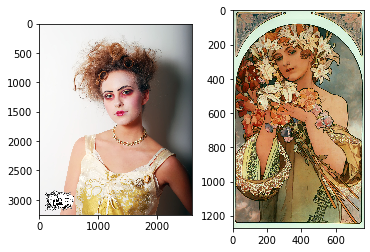

In [61]:
num = 2
file_c = '.\\Data\\c_'+str(num)+'.png'
picture_c = Image.open(file_c)
file_s = '.\\Data\\s_'+str(num)+'.png'
picture_s = Image.open(file_s)
face_c = open('.\\Data\\c_'+str(num)+'.txt', "r")
face_string_c = face_c.read()
face_string_c = "face_string_c = " + face_string_c

if face_string_c != 'face_string_c = ': 
    exec(face_string_c)
    print(face_string_c)
    box_c = face_string_c[0]['box']
    keypoints_c = face_string_c[0]['keypoints']

else:
    print('No face here! Try different content image')

face_s = open('.\\Data\\s_'+str(num)+'.txt', "r")
face_string_s = face_s.read()
face_string_s = 'face_string_s = ' + face_string_s
if face_string_s != 'face_string_s = ': 
    exec(face_string_s)
    print(face_string_s)
    box_s = face_string_s[0]['box']
    keypoints_s = face_string_s[0]['keypoints']

else:
    print('No faces here! Try different style image')

plt.subplot(1, 2, 1)
plt.imshow(picture_c)
plt.subplot(1, 2, 2)
plt.imshow(picture_s)     

In [62]:
x_c = np.array([keypoints_c[name] for name in keypoints_c], dtype=np.double)
x_s = np.array([keypoints_s[name] for name in keypoints_s], dtype=np.double)
shift1, shift2, scale1, scale2, R, s, x_c_rot, x_s_rot, disparity = procrustes(x_c, x_s)
angle = np.arccos(R[0,0])/np.pi*180
scale = (scale1 /scale2) * s
shift = shift1 - np.dot(shift2, R.T * (scale1 /scale2) * s)
#np.dot(x_s, R.T) * (scale1 /scale2) * s + shift1 - np.dot(shift2, R.T * (scale1 /scale2) * s)

# Transform

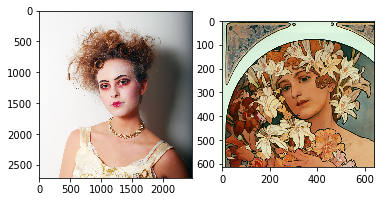

In [63]:
width_c, height_c = picture_c.size
width_s, height_s = picture_s.size
width_crop_c = min(shift1[0], width_c - shift1[0])
height_crop_c = min(shift1[1], height_c - shift1[0])
width_crop_s = min(shift2[0], width_s - shift2[0])
height_crop_s = min(shift2[1], height_s - shift2[0])

picture_c_proc = picture_c.crop((shift1[0] - width_crop_c, shift1[1] - height_crop_c, shift1[0] + width_crop_c, shift1[1] + height_crop_c))
picture_s_proc = picture_s.crop((shift2[0] - width_crop_s, shift2[1] - height_crop_s, shift2[0] + width_crop_s, shift2[1] + height_crop_s))

plt.subplot(1, 2, 1)
plt.imshow(picture_c_proc)  
plt.subplot(1, 2, 2)
plt.imshow(picture_s_proc)     

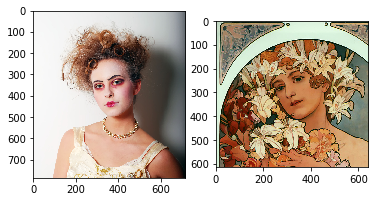

In [64]:
if scale > 1:
    picture_c_proc = picture_c_proc.resize(size = [int(picture_c_proc.size[0] / scale), int(picture_c_proc.size[1] / scale)])
    box_c = np.array(box_c) / scale
else:
    picture_s_proc = picture_s_proc.resize(size = [int(picture_s_proc.size[0] * scale), int(picture_s_proc.size[1] * scale)])
    box_s = np.array(box_s) * scale
    
plt.subplot(1, 2, 1)
plt.imshow(picture_c_proc)  
plt.subplot(1, 2, 2)
plt.imshow(picture_s_proc) 

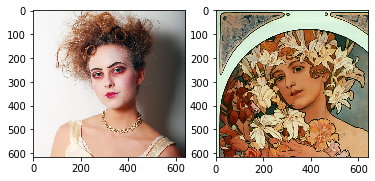

In [65]:
width_c, height_c = picture_c_proc.size
width_s, height_s = picture_s_proc.size
width_crop = int((width_c - width_s)/2)
width_crop_c = max(width_crop,0)
width_crop_s = max(-width_crop,0)
height_crop = int((height_c - height_s)/2)
height_crop_c = max(height_crop,0)
height_crop_s = max(-height_crop,0)

picture_c_proc = picture_c_proc.crop((width_crop_c, height_crop_c, width_c - width_crop_c, height_c - height_crop_c))
picture_s_proc = picture_s_proc.crop((width_crop_s, height_crop_s, width_s - width_crop_s, height_s - height_crop_s))

plt.subplot(1, 2, 1)
plt.imshow(picture_c_proc)  
plt.subplot(1, 2, 2)
plt.imshow(picture_s_proc) 

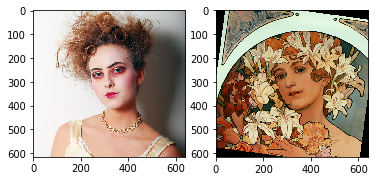

In [66]:
picture_s_proc = picture_s_proc.rotate(-angle)
plt.subplot(1, 2, 1)
plt.imshow(picture_c_proc)  
plt.subplot(1, 2, 2)
plt.imshow(picture_s_proc) 

# Faces

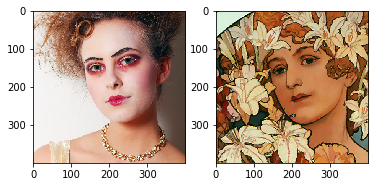

In [67]:
box_width, box_height = np.array(box_c, 'int')[2:4]
center_w, center_h = np.array(np.array(picture_c_proc.size)/2, 'int')
plt.subplot(1, 2, 1)
plt.imshow(np.array(picture_c_proc)[(center_w-box_width):(center_w+box_width), (center_h-box_width):(center_h + box_width),:])  
plt.subplot(1, 2, 2)
plt.imshow(np.array(picture_s_proc)[(center_w-box_width):(center_w+box_width), (center_h-box_width):(center_h + box_width),:]) 

In [68]:
box = [(center_w-box_width), (center_h-box_width), box_width * 2, box_height * 2]
box

[120, 108, 400, 484]